In [53]:
import pandas as pd

In [77]:
from minisom import MiniSom

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import datasets
from sklearn.preprocessing import scale

import seaborn as sns

In [91]:
# load the digits dataset from scikit-learn
digits = datasets.load_digits(n_class=10)
data = digits.data  # matrix where each row is a vector that represent a digit.
data = scale(data)
dfx = pd.DataFrame(data)
num = digits.target  # num[i] is the digit represented by data[i]
cols = dfx.columns.tolist()
np.random.shuffle(cols)
dfx1 = dfx[cols]

X = dfx1.T.values


In [122]:

som = MiniSom(8, 8, 1797, sigma=1, learning_rate=0.5, neighborhood_function='triangle')
som.pca_weights_init(X)
som.train(X, 10000, random_order=True, verbose=True)  # random training

/home/shenwanxiang/anaconda3/envs/molmap/lib/python3.6/site-packages/minisom.py:370: ComplexWarning: Casting complex values to real discards the imaginary part
  self._weights[i, j] = c1*pc[pc_order[0]] + c2*pc[pc_order[1]]


 [ 10000 / 10000 ] 100% - 0:00:00 left 
 quantization error: 16.10853863033332


/home/shenwanxiang/anaconda3/envs/molmap/lib/python3.6/site-packages/minisom.py:486: RuntimeWarning: invalid value encountered in sqrt
  return sqrt(-2 * cross_term + input_data_sq + weights_flat_sq.T)


In [123]:
wp = []
for i, x in enumerate(X):
    x,y = som.winner(x)
    wp.append([x, y, i])

In [124]:
idx = pd.DataFrame(wp).sort_values([0, 1])[2].tolist()

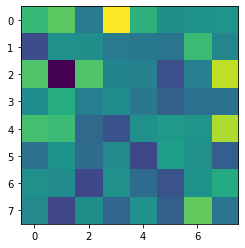

In [125]:
plt.imshow(X[:, 12].reshape(8,8))

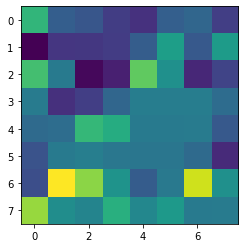

In [130]:
plt.imshow(dfx1.values[19][idx].reshape(8,8))

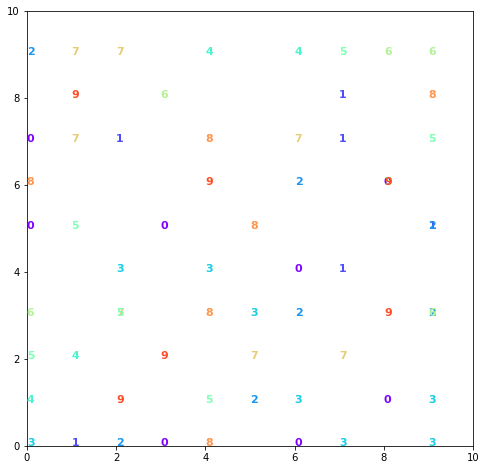

In [76]:
plt.figure(figsize=(8, 8))
wmap = {}
im = 0
for x, t in zip(data.T, num):  # scatterplot
    w = som.winner(x)
    wmap[w] = im
    plt. text(w[0],  w[1],  str(t),
              color=plt.cm.rainbow(t / 10.), fontdict={'weight': 'bold',  'size': 11})
    im = im + 1
plt.axis([0, som.get_weights().shape[0], 0,  som.get_weights().shape[1]])
# plt.savefig('resulting_images/som_digts.png')
plt.show()

<AxesSubplot:>

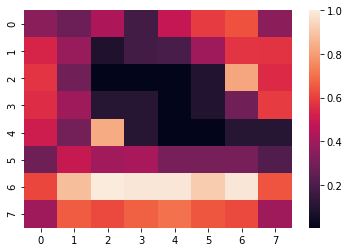

In [134]:
sns.heatmap(som.distance_map())